In [25]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
import glob, os
from NuRadioReco.utilities import fft
from NuRadioReco.utilities import units
from NuRadioReco.framework import base_trace
from NuRadioReco.modules.io.rno_g import rnogDataReader
from NuRadioReco.utilities import units
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("analyze.py"))))
sys.path.insert(1, '/lustre/fs22/group/radio/dhjelm/')
import data_preprocessing
import analyze

In [3]:
path_to_data = "/../../../../pnfs/ifh.de/acs/radio/diskonly/data/inbox/station11"

In [4]:
# Save original directory
owd = os.getcwd()
print(owd)

/lustre/fs22/group/radio/dhjelm/emg_gan/windy


In [5]:
# Change to the data directory
os.chdir(path_to_data)

In [7]:
data = np.empty((0, 2048))
runs = [392, 393, 394, 587, 588, 589, 601, 602,603, 613, 614, 615]

for run in runs:

    reader = rnogDataReader.RNOGDataReader([f"/../../../../pnfs/ifh.de/acs/radio/diskonly/data/inbox/station11/run{run}/combined.root"])

    # Get all events in reader
    for event in reader.get_events():

    # event = reader.get_event_i(0)
        # Get station for specific event
        station = event.get_station(event.get_station_ids()[0])

        # Check if station has triggered
        if station.has_triggered('radiant_trigger'):
    #         print("Radiant triggered")

           # Loop through all upward facing LPDAs
            for channel_id in [13,16,19]:
                channel = station.get_channel(channel_id)
                if np.max(np.abs(channel.get_trace()/0.001)) > 100:
                    # Add windy event to data
                    data = np.append(data, np.expand_dims(channel.get_trace()/0.001, axis=0), axis=0)

            

In [8]:
print(np.shape(data))

(5856, 2048)


In [9]:
start_wind = int(420*3.2)
end_wind = int(420*3.2 + 512)

In [15]:
trimmed = data[:,start_wind:end_wind]
print(np.shape(trimmed))


(5856, 512)


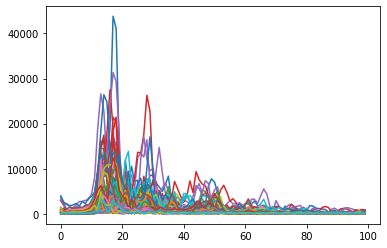

In [19]:
for i in range(100):
#     plt.plot(test[i*5])
    plt.plot(abs(fft.time2freq(trimmed[i*5], 3.2*units.GHz)))

In [12]:
pwd

'/net/acs_dcache/radio/diskonly/data/inbox/station11'

In [13]:
os.chdir(owd)

In [14]:
pwd

'/lustre/fs22/group/radio/dhjelm/emg_gan/windy'

In [26]:
from data_preprocessing import standardize

In [27]:
standardized = standardize(trimmed)

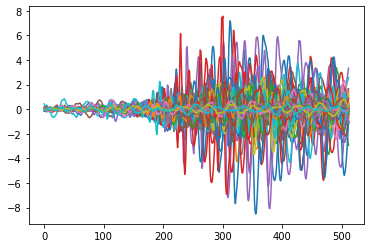

In [30]:
for i in range(100):
    plt.plot(standardized[i*5])
#     plt.plot(abs(fft.time2freq(standardized[i*5], 3.2*units.GHz)))

In [31]:
windy = standardized

In [32]:
np.save("windy_512",windy)